<img src="https://raw.githubusercontent.com/Mauritas99/Proyect_images/refs/heads/main/Analisis_de_precios.png">

><h2>1.Importar librerias</h2>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,TargetEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h5><li style="font-size:1.3rem; top:2px;"><em>Análisis de Precios y Factores de Calidad</em></li></h5>
    <ul>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Analizar la relación entre el precio y la puntuación de los vinos.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Identificar si existen regiones o variedades de uva con mejor relación calidad-precio.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">[x] Aplicar técnicas de regresión para predecir el precio de un vino según sus características.
        </li>
    </ul>
    <br>

In [ ]:
df_wines = pd.read_csv("../1.1_Data_limpia/df_wines_limpio.csv")

><h4 style="font-size:1.7rem;"><em>2. Ratio Precio / Puntaje.</em></h4>

<p style="text-align:center;"><em>El ratio indica en que manera el precio se relaciona con el puntaje obtenido<p>

<h5>Escala de puntaje según Wine Enthusiast’s</h5>
<ul>
  <li><b>98-100 points</b>: Classic</li>
  <li><b>94-97 points</b>: Superb</li>
  <li><b>90-93 points</b>: Excellent</li>
  <li><b>87-89 points</b>: Very Good</li>
  <li><b>83-86 points</b>: Good</li>
  <li><b>80-82 points</b>: Acceptable</li>
</ul>

<ul>
  <li><b>Valores cercanos a 0</b>: Indican una relación calidad-precio promedio. Estos vinos tienen un precio y un puntaje que se encuentran cerca de la media de su respectiva variable.
  </li>
  <li><b>Valores positivos</b>: Indican una relación calidad-precio menos favorable. Estos vinos tienen un precio relativamente alto en comparación con su puntaje.
  </li>
  <li><b>Valores negativos</b>: Indican una relación calidad-precio más favorable. Estos vinos tienen un precio relativamente bajo en comparación con su puntaje
  </li>
</ul>

In [6]:
from scipy.stats.mstats import winsorize

ratio_scal_col = df_wines.loc[:,["price","points"]] # Columnas a escalar.

# Corregir outlier de variable precio para estandarizar el ratio.

ratio_scal_col["price"] = winsorize(ratio_scal_col["price"],limits=[0.05,0.03]) # El precio maximo posible ahora es 100.

scaler = StandardScaler() # Normalizamos los valores de "price" y "score"
price_scal = scaler.fit_transform(ratio_scal_col)
price_scal_df = pd.DataFrame(data=price_scal,columns=scaler.get_feature_names_out())

In [7]:
 # Reiniciamos indices para coincidir las filas.

df_wines = df_wines.reset_index(drop=True)
price_scal_df = price_scal_df.reset_index(drop=True)

df_wines["price/point_ratio"] = (price_scal_df["price"] / price_scal_df["points"])

<h4 style="font-size:1.7rem;"><em>2.1 Precio por puntaje según agrupaciones (frecuecia principal por variable).</em></h4>

In [8]:
# Según pais.
top_12_country = ['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina','Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa']
df_wines_country_top = df_wines[df_wines["country"].isin(top_12_country)]
score_country = df_wines_country_top.groupby("country")["price/point_ratio"].mean().sort_values(ascending=False)

# Según variedad de uva.
top_12_var = ['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon','Bordeaux-style Red Blend', 'Red Blend', 'Riesling', 'Syrah','Nebbiolo', 'Portuguese Red', 'Sauvignon Blanc', 'Malbec', 'Sangiovese']
df_wines_var_top = df_wines[df_wines["variety"].isin(top_12_var)]
score_variety = df_wines_var_top.groupby("variety")["price/point_ratio"].mean().sort_values(ascending=False)

# Según vineria.
top_12_winery = ['Wines & Winemakers', 'Testarossa', 'DFJ Vinhos', 'Williams Selyem','Louis Latour', 'Georges Duboeuf', 'Chateau Ste. Michelle','Concha y Toro', 'Columbia Crest', 'Kendall-Jackson', 'Siduri','Gary Farrell']
df_wines_wine_top = df_wines[df_wines["winery"].isin(top_12_winery)]
score_winery = df_wines_wine_top.groupby("winery")["price/point_ratio"].mean().sort_values(ascending=False)

# Según región
top_12_region = ['Napa Valley', 'Columbia Valley (WA)','Russian River Valley', 'California', 'Paso Robles', 'Mendoza','Willamette Valley', 'Alsace', 'Champagne', 'Barolo', 'Finger Lakes','Sonoma Coast']
df_wines_region_top = df_wines[df_wines["region_1"].isin(top_12_region)]
score_region = df_wines_region_top.groupby("region_1")["price/point_ratio"].mean().sort_values(ascending=False)


<h4 style="font-size:1.7rem;"><em>2.2 Visualizaciones de agrupaciones.</em></h4>

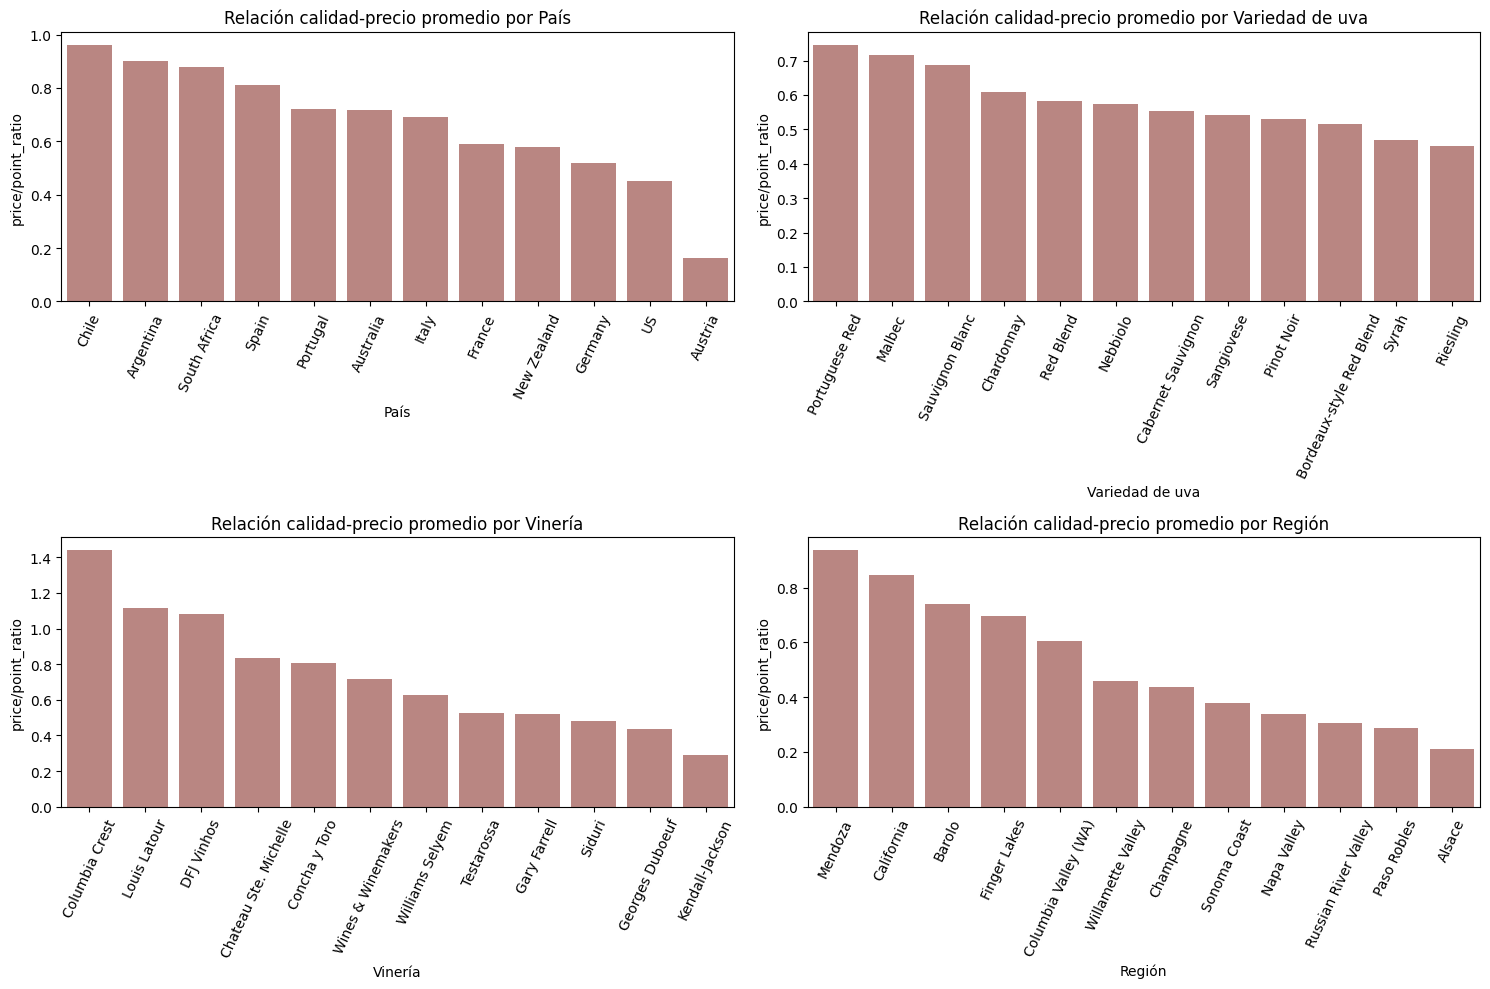

In [13]:
# Datos para los gráficos
data = {
    "País": score_country,
    "Variedad de uva": score_variety,
    "Vinería": score_winery,
    "Región": score_region,
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas, 2 columnas

for i, (title, scores) in enumerate(data.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Crea el gráfico de barra en el subplot
    sns.barplot(x=scores.index, y=scores.values, color="xkcd:brownish pink", ax=ax)
    ax.set_title(f"Relación calidad-precio promedio por {title}")
    ax.set_xlabel(title)
    ax.set_ylabel("price/point_ratio")
    ax.tick_params(axis='x', rotation=65)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

<h4><em>Resumen de visualizaciones por ratio</em></h4>

<ul>
    <li>Segun la interpretación del ratio normalizado, a medida que el valor del mismo disminuye, el vino de considera conveniente en cuanto a puntaje obtenido por el precio pagado.</li>
    <li>Por país, aquellos provenientes de <b>Austria</b> poseen un valor mas bajo en promedio del ratio</li>
    <li>Según vinería, aquellos vinos provenientes de la vineria <b>Kendall-Jackson</b> responden a una mejor relacion <b>calidad-precio</b></li>
    <li>Finalmente, según región, aquellos de <b>Alsace, Francia</b> responden mejor a esta premisa, en contraparte con aquellos provenientes de Mendoza, Argentina</li>
</ul>

><h4 style="font-size:1.7rem;"><em>3. Modelo de predicción de precio.</em></h4>

<h4 style="font-size:1.7rem;"><em>3.1 Preprocesamiento.</em></h4>

In [14]:
df_wines_reg = df_wines.copy() # Creamos una copia para trabajar el dataset.

# Eliminamos columnas fuera de interés.
df_wines_reg.drop(columns=["description","designation","region_2","taster_twitter_handle","title","price/point_ratio","price_categ"],inplace=True)

<h4 style="font-size:1.7rem;"><em>3.1.1 Identificar variables a emplear.</em></h4>

In [15]:
# Variables Categóricas

col_nom = ["country","province","region_1","taster_name","variety", "winery"]

df_calc_corr = df_wines_reg.copy()

# Se decidio emplear labelEncoder debido a la cantidad de valores posiblees que pueda tomar cada columna, que imposibilita un OHE.
label_enc = LabelEncoder()
for col in df_calc_corr.select_dtypes(include=['object']).columns:
    df_calc_corr[col] = label_enc.fit_transform(df_calc_corr[col])

<p><em>Para elegir que variables categoricas emplear, es necesario emplear una matriz de correlación.</em></p>

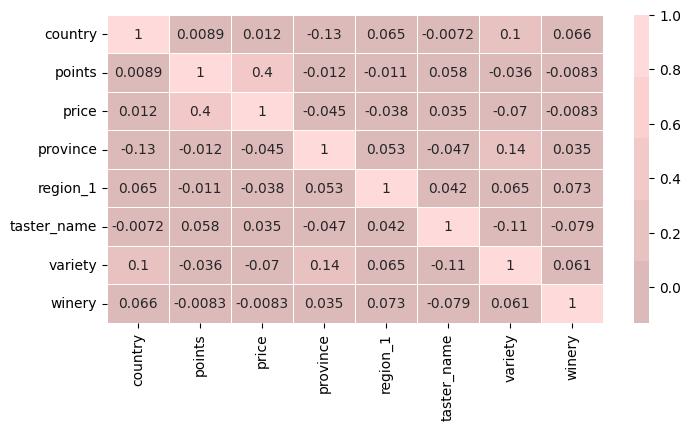

In [16]:
matriz = df_calc_corr.corr()
colors = ["#dcbaba", "#e8c1c1", "#f3c8c8", "#fdd0d0", "#ffdadb"]

# Matriz de correlación.

cmap = sns.color_palette(colors, as_cmap=True)
plt.figure(figsize=(8,4))
sns.heatmap(matriz, annot=True,cmap=cmap,linewidths=0.5)
plt.show()

<p><em>Debido a las correlaciones debiles que arrojó el gráfico, se retiraran la mayoria de variables categoricas, a excepcion de <b>taster_name</b> , <b>variety</b>, <b>province</b> y <b>winery</b>.</em></p>

<h4 style="font-size:1.7rem;"><em>3.1.2 Definir pipeline.</em></h4>

In [19]:
col_cat_X = ['province','taster_name','variety',"winery"]
col_num_X = ["points"]

X = df_wines_reg[col_cat_X + col_num_X]
y = df_wines_reg["price"]

y = winsorize(y,limits=[0.05,0.03]) # Eliminamos los outliers antes de escalar los datos
y = pd.DataFrame(y)
# Crear preprocesador

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(), col_cat_X),
        ('num', MinMaxScaler(feature_range=(1,5)), col_num_X)
    ])

# Crear pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,random_state=42))
    ])


<h4 style="font-size:1.7rem;"><em>3.2 Crear modelo.</em></h4>

<h4 style="font-size:1.7rem;"><em>3.2.1 Definir grupo de entrenamiento - prueba.</em></h4>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4 style="font-size:1.7rem;"><em>3.2.2 Escalar variable a predecir.</em></h4>

In [21]:
scaler_y = StandardScaler()

scaler_y.fit(y_train.values.reshape(-1, 1))

y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

<h4 style="font-size:1.7rem;"><em>3.2.3 Entrenar el modelo.</em></h4>

In [22]:
pipeline.fit(X_train, y_train_scaled.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', TargetEncoder(),
                                                  ['province', 'taster_name',
                                                   'variety', 'winery']),
                                                 ('num',
                                                  MinMaxScaler(feature_range=(1,
                                                                              5)),
                                                  ['points'])])),
                ('forest',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=5, random_state=42))])

<h4 style="font-size:1.7rem;"><em>3.2.4 Realizar predicción.</em></h4>

In [23]:
y_pred_scaled = pipeline.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)) # Invertir la predicción para obtener el valor de price real.

<h4 style="font-size:1.7rem;"><em>3.2.5 Evaluar modelo.</em></h4>

In [24]:
mse = mean_squared_error(y_test, y_pred) # Error cuaadratico medio.
mae = mean_absolute_error(y_test, y_pred) # Error medio absoluto.
r2 = r2_score(y_test, y_pred) # Coheficiente de determinacion.

# Imprime las métricas
print(f"MSE: {round(mse,2)}")
print(f"MAE: {round(mae,2)}")
print(f"R2: {round(r2,2)}")

MSE: 171.32
MAE: 9.07
R2: 0.62


In [25]:
df_wines

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_categ,price/point_ratio
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35,Sicily & Sardinia,Etna,No posee sub-región,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Premium,-0.165659
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,Sin dato,No posee sub-región,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Accesible,1.842202
2,US,"Tart and snappy, the flavors of lime flesh and...",Desconocida,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Accesible,1.942595
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,No posee sub-región,Alexander Peartree,Desconocido,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Accesible,2.042988
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Premium,-3.177450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119982,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28,Mosel,Sin dato,No posee sub-región,Anna Lee C. Iijima,Desconocido,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Premium,-0.497263
119983,US,Citation is given as much as a decade of bottl...,Desconocida,90,75,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,Premium,3.871297
119984,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30,Alsace,Alsace,No posee sub-región,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Premium,-0.311366
119985,France,"A dry style of Pinot Gris, this is crisp with ...",Desconocida,90,32,Alsace,Alsace,No posee sub-región,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,Premium,-0.125470


><h4 style="font-size:1.7rem;"><em>4. Guardar csv.</em></h4>

In [26]:
df_wines.to_csv("../1.1_Data_limpia/df_wines_limpio_2.csv",index=False)